# Exploratory Data Analysis (EDA)

### 1. Import necessary libraries:

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

### 2. Load data as a Pandas DataFrame:

In [121]:
path_irrad = "../data/G07A_DATOS_IRRAD.csv"
df_orig_irrad = pd.read_csv(path_irrad)

# Parse the date (string) for it to be a datetime with format yyyy/mm/dd
df_orig_irrad['FECHA'] = pd.to_datetime(df_orig_irrad['FECHA'], format='%Y-%m-%d')

s = df_orig_irrad.loc[:,'FECHA']
df_orig_irrad['FECHA'] =  s.dt.date

df_orig_irrad.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,414536.22,1193085.20,481816.38,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,319990.20,926238.10,182854.10,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,403464.62,1146347.20,360073.94,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,349597.03,1016177.06,315783.62,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,408705.38,1090662.90,532075.10,0.0,0.0,2015,1,5,0


In [122]:
path_util = "../data/G07A_DATOS_UTIL.csv"
df_orig_util = pd.read_csv(path_util)

# Parse the date (string) for it to be a datetime with format yyyy/mm/dd
df_orig_util['FECHA'] = pd.to_datetime(df_orig_util['FECHA'], format='%Y-%m-%d')

s = df_orig_util.loc[:,'FECHA']
df_orig_util['FECHA'] =  s.dt.date

df_orig_util.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.027848,0.235443,0.263291,0.039241,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.027848,0.181857,0.205063,0.024051,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.029536,0.237975,0.235865,0.036287,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.029114,0.196203,0.210970,0.026160,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.028270,0.205485,0.228270,0.036287,0.0,0.0,2015,1,5,0


In [123]:
df = pd.merge(df_orig_irrad, df_orig_util, on=['FECHA', 'ANNO', 'MES', 'DIA', 'DIASEM'] , how='inner')

In [102]:
df.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,...,DIA,DIASEM,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21
0,2015-01-01,0.0,0.0,0.0,414536.22,1193085.20,481816.38,0.0,0.0,2015,...,1,3,0.0,0.0,0.027848,0.235443,0.263291,0.039241,0.0,0.0
1,2015-01-02,0.0,0.0,0.0,319990.20,926238.10,182854.10,0.0,0.0,2015,...,2,4,0.0,0.0,0.027848,0.181857,0.205063,0.024051,0.0,0.0
2,2015-01-03,0.0,0.0,0.0,403464.62,1146347.20,360073.94,0.0,0.0,2015,...,3,5,0.0,0.0,0.029536,0.237975,0.235865,0.036287,0.0,0.0
3,2015-01-04,0.0,0.0,0.0,349597.03,1016177.06,315783.62,0.0,0.0,2015,...,4,6,0.0,0.0,0.029114,0.196203,0.210970,0.026160,0.0,0.0
4,2015-01-05,0.0,0.0,0.0,408705.38,1090662.90,532075.10,0.0,0.0,2015,...,5,0,0.0,0.0,0.028270,0.205485,0.228270,0.036287,0.0,0.0


In [103]:
df.shape

(2192, 21)

In [104]:
# Separando el DataFrame en partes según la descripción
fecha_df = df[['ANNO', 'MES', 'DIA', 'DIASEM']]
irrad_df = df.filter(regex='^IRRAD')
util_df = df.filter(regex='^UTIL')

# Transformando los DataFrames de irradiación y utilización
irrad_melted = irrad_df.melt(var_name='FranjaHoraria', value_name='Irradiacion')
util_melted = util_df.melt(var_name='FranjaHoraria', value_name='Utilizacion')


# Ajustando la franja horaria para extracción
irrad_melted['FranjaHoraria'] = irrad_melted['FranjaHoraria'].str.extract('(\d+)')
util_melted['FranjaHoraria'] = util_melted['FranjaHoraria'].str.extract('(\d+)')

# Repetimos fecha_df para cada franja horaria (8 veces)
fecha_expanded = pd.concat([fecha_df]*irrad_df.shape[1], ignore_index=True)
fecha_expanded

,ANNO,MES,DIA,DIASEM
0,2015,1,1,3
1,2015,1,2,4
2,2015,1,3,5
3,2015,1,4,6
4,2015,1,5,0
...,...,...,...,...
17531,2020,12,27,6
17532,2020,12,28,0
17533,2020,12,29,1
17534,2020,12,30,2


In [105]:
# Asegúrate de que todos los DataFrames tengan el mismo número de filas
if len(fecha_expanded) == len(irrad_melted) == len(util_melted):
    # Resetear índices para asegurar una correcta alineación
    df_repetido = fecha_expanded.reset_index(drop=True)
    irrad_melted = irrad_melted.reset_index(drop=True)
    util_melted = util_melted.reset_index(drop=True)

    # Extraer las columnas específicas y resetear sus índices
    irrad_serie = irrad_melted['Irradiacion'].reset_index(drop=True)
    franja_serie = irrad_melted['FranjaHoraria'].reset_index(drop=True)  # Incluir la columna 'franja horaria'
    util_serie = util_melted['Utilizacion'].reset_index(drop=True)

    # Unir los DataFrames/series
    df_final = pd.concat([df_repetido, franja_serie, irrad_serie, util_serie], axis=1)
else:
    print("Los DataFrames no tienen el mismo número de filas.")

# Mostrar el resultado
df_final


,ANNO,MES,DIA,DIASEM,FranjaHoraria,Irradiacion,Utilizacion
0,2015,1,1,3,00,0.0,0.0
1,2015,1,2,4,00,0.0,0.0
2,2015,1,3,5,00,0.0,0.0
3,2015,1,4,6,00,0.0,0.0
4,2015,1,5,0,00,0.0,0.0
...,...,...,...,...,...,...,...
17531,2020,12,27,6,21,0.0,0.0
17532,2020,12,28,0,21,0.0,0.0
17533,2020,12,29,1,21,0.0,0.0
17534,2020,12,30,2,21,0.0,0.0


#### Pintar gráficas

In [106]:
# Primero, creamos la fecha como datetime sin convertirla a date
df_final['Fecha'] = pd.to_datetime(df_final['ANNO'].astype(str) + '-' + 
                                   df_final['MES'].astype(str) + '-' + 
                                   df_final['DIA'].astype(str), format='%Y-%m-%d')

# Ahora, vamos a añadir la hora a 'Fecha' utilizando 'FranjaHoraria'
# Asumiendo que 'FranjaHoraria' es numérica y representa la hora en bloques de 3 horas (00, 03, 06, 09...)
# Convertimos 'FranjaHoraria' a string, añadimos ceros a la izquierda para tener un formato de hora (HH) y luego agregamos ':00' para completar el formato HH:MM
df_final['Hora'] = df_final['FranjaHoraria'].apply(lambda x: f"{str(x).zfill(2)}:00")

# Añadimos 'FranjaHoraria' a 'Fecha' para tener la fecha completa con hora
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'].astype(str) + ' ' + df_final['FranjaHoraria'])

# Ver las primeras filas para confirmar que se ha realizado correctamente
df_final.head()


,ANNO,MES,DIA,DIASEM,FranjaHoraria,Irradiacion,Utilizacion,Fecha,Hora
0,2015,1,1,3,00,0.0,0.0,2015-01-01,00:00
1,2015,1,2,4,00,0.0,0.0,2015-01-02,00:00
2,2015,1,3,5,00,0.0,0.0,2015-01-03,00:00
3,2015,1,4,6,00,0.0,0.0,2015-01-04,00:00
4,2015,1,5,0,00,0.0,0.0,2015-01-05,00:00


In [118]:
# Representar la serie temporal de irradiación (fecha y hora) con plotly
import plotly.express as px

fig = px.line(df_final, x='Fecha', y='Irradiacion', title='Serie temporal de irradiación')
fig.show()


In [120]:
# Representar la serie temporal de irradiación (fecha y hora) con plotly
import plotly.express as px

fig = px.line(df_final, x='Fecha', y='Utilizacion', title='Serie temporal de utilización')
fig.show()


### 3. EDA

#### 3.1 Missing values

In [73]:
# Check out the data
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ANNO           17536 non-null  int64  
 1   MES            17536 non-null  int64  
 2   DIA            17536 non-null  int64  
 3   DIASEM         17536 non-null  int64  
 4   FranjaHoraria  17536 non-null  object 
 5   Irradiacion    17536 non-null  float64
 6   Utilizacion    17536 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 959.1+ KB


In [74]:
# Check out for missing values
df_final.isnull().sum()

ANNO             0
MES              0
DIA              0
DIASEM           0
FranjaHoraria    0
Irradiacion      0
Utilizacion      0
dtype: int64

No missing values are detected in either of the DataFrames. 

#### 3.2 Main Stats

In [75]:
# Columns main stats:
df_final.describe()

,ANNO,MES,DIA,DIASEM,Irradiacion,Utilizacion
count,17536.000000,17536.000000,17536.000000,17536.000000,1.753600e+04,17536.000000
mean,2017.500456,6.521898,15.732664,3.000000,4.729477e+05,0.079512
std,1.708230,3.449085,8.801621,1.999601,7.341697e+05,0.117820
min,2015.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,2016.000000,4.000000,8.000000,1.000000,0.000000e+00,0.000000
50%,2017.500000,7.000000,16.000000,3.000000,0.000000e+00,0.010896
75%,2019.000000,10.000000,23.000000,5.000000,7.341657e+05,0.127996
max,2020.000000,12.000000,31.000000,6.000000,3.017838e+06,0.537553


#### 3.3 Histograms

Text(0, 0.5, 'Irradiación')

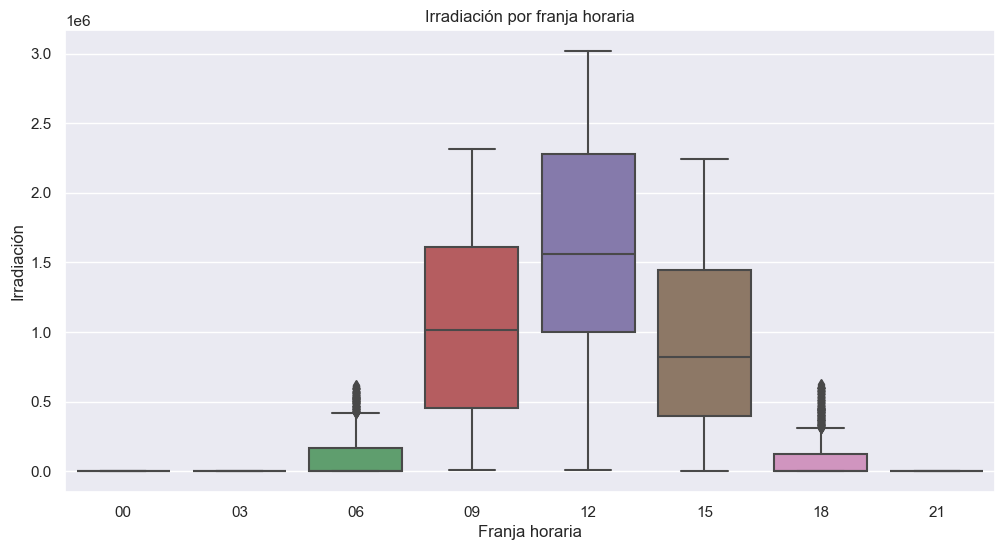

In [76]:
# Irradiación por franja horaria
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x='FranjaHoraria', y='Irradiacion')
plt.title('Irradiación por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Irradiación')



Text(0, 0.5, 'Utilización')

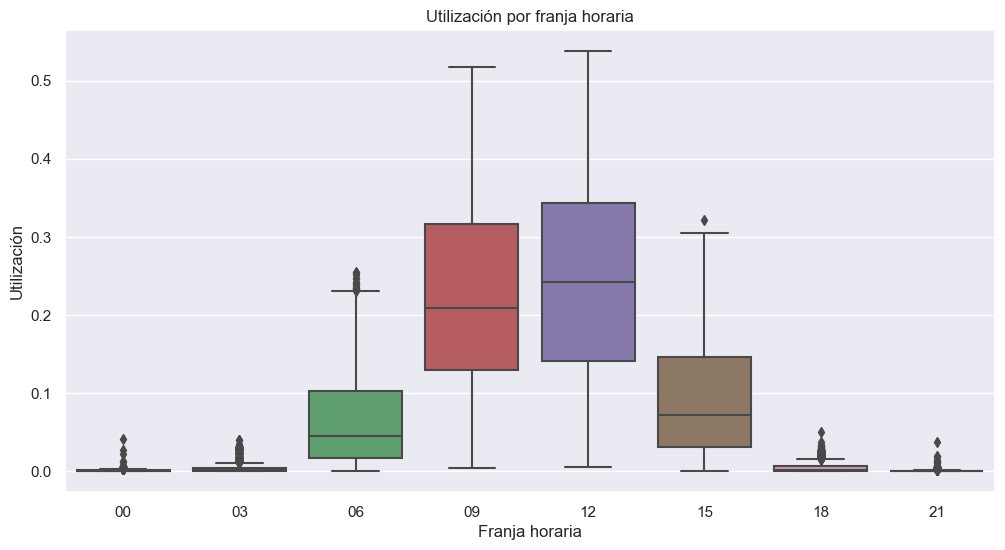

In [77]:
# Utilización por franja horaria    
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_final, x='FranjaHoraria', y='Utilizacion')
plt.title('Utilización por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Utilización')


#### 3.4 Pairplots

Text(0.5, 1.02, 'Pairplot de irradiación y utilización')

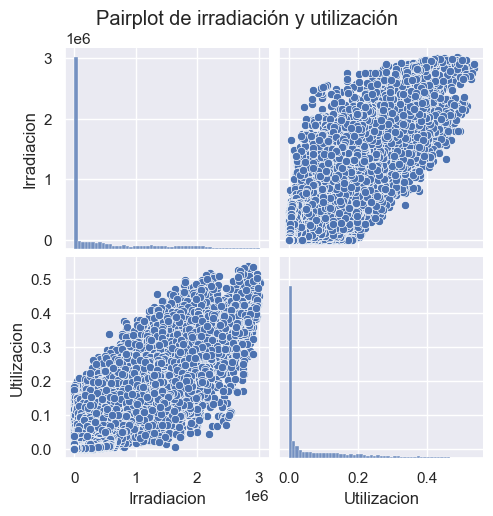

In [78]:
# Pairplot:
sns.pairplot(df_final[['Irradiacion', 'Utilizacion']])
plt.suptitle('Pairplot de irradiación y utilización', y=1.02)


A strong linear relationship can be reported between each variable in the IRRADHXX series and its adjacent variables for XX in ['09', '12', '15']. As the IRRADHXX coefficient is calculated as the cumulative sum of irradiation over three consecutive time periods (XX, XX+1, XX+2), and taking into consideration the typical temperature patterns throughout the day, this relationship is logical.

Newly, a strong linear relationship exists between each variable in the UTILHXX series and its adjacent variables.

#### 3.5 Correlation Matrix

Text(0.5, 1.0, 'Correlación entre irradiación y utilización')

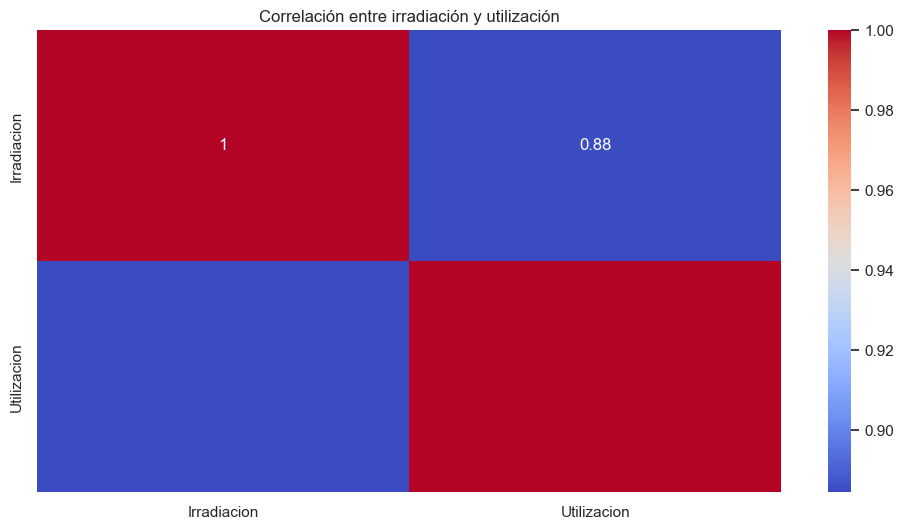

In [79]:
# Correlation between numeric variables (graphical)
plt.figure(figsize=(12, 6))
sns.heatmap(df_final[['Irradiacion', 'Utilizacion']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre irradiación y utilización')



#### 3.5 Scatter plot

Text(0, 0.5, 'Utilización')

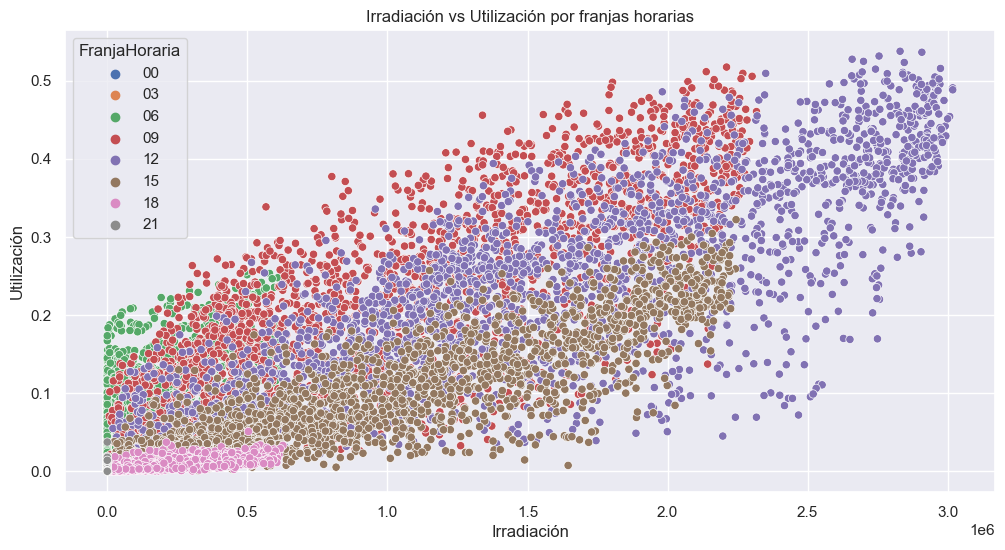

In [80]:
# Irradiación vs utilización por franjas horarias
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_final, x='Irradiacion', y='Utilizacion', hue='FranjaHoraria')
plt.title('Irradiación vs Utilización por franjas horarias')
plt.xlabel('Irradiación')
plt.ylabel('Utilización')

La gráfica que has subido muestra la relación entre la irradiación y la utilización a lo largo de diferentes franjas horarias del día. Basándome en los colores, parece que los puntos están codificados por hora, lo que nos permite ver cómo se comporta esta relación en diferentes momentos del día. Aquí hay algunas observaciones que podemos hacer:

1. **Relación Positiva:** Hay una tendencia general que sugiere una relación positiva entre la irradiación y la utilización; es decir, a medida que la irradiación aumenta, también lo hace la utilización. Esto es consistente con lo que esperaríamos en un sistema donde la energía solar es convertida y utilizada o almacenada.

2. **Diferencias por Franja Horaria:**
   - Las franjas horarias más tempranas (00, 03) y las más tardías (21) tienen, en general, una menor irradiación y utilización, lo cual tiene sentido dado que estas horas están cerca del amanecer y el atardecer o durante la noche.
   - Las franjas horarias centrales (06, 09, 12, 15, 18), que corresponden a las horas diurnas, muestran una irradiación y una utilización significativamente mayores. Esto indica la generación de energía durante las horas de máxima luz solar.

3. **Saturación o Limitaciones del Sistema:** Algunos puntos con alta irradiación no tienen una utilización proporcionalmente alta, lo que podría indicar que el sistema alcanza su capacidad máxima de utilización o hay un umbral a partir del cual la energía adicional no se utiliza de forma eficiente.

4. **Variabilidad en la Utilización:** Aunque la irradiación parece aumentar de manera continua y concentrada, la utilización muestra una mayor variabilidad. Esto podría deberse a la eficiencia del sistema, condiciones de operación variables, o a la presencia de otros factores que afectan cómo se consume la energía generada.

5. **Eficiencia del Sistema:** En las franjas horarias con la mayor irradiación (probablemente mediodía), parece haber una gran dispersión en la utilización, lo que podría sugerir que la eficiencia del sistema varía. Por ejemplo, algunos sistemas pueden estar mejor diseñados o ubicados y, por tanto, utilizan la irradiación de manera más eficiente.

6. **Datos Atípicos:** Algunos datos atípicos, especialmente aquellos con baja irradiación y alta utilización, o viceversa, pueden ser interesantes para una investigación más detallada, ya que podrían indicar anomalías en el sistema o errores de medición.

En resumen, esta gráfica proporciona una buena visión general de cómo la irradiación y la utilización están correlacionadas y cómo esta correlación varía en diferentes momentos del día. Para sacar conclusiones más definitivas, sería útil considerar la configuración específica del sistema, las condiciones locales, y otros factores operacionales o ambientales que podrían influir en estos resultados.